<a href="https://colab.research.google.com/github/melrepa/MCD_IngCaracteristicas/blob/main/Proyecto%202/Proyecto2_MelissaReyesPaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 (parte 1): Tablero que cuente una historia.

Melissa Reyes Paz

**Profesor:** Dr. Julio Waissman Vilanova

Ingeniería de Características

Maestría en Ciencia de Datos de la Universidad de Sonora

Hermosillo, Sonora. Noviembre del 2022

<h2 aling = center > Instrucciones </h2>

***
En la primera parte del proyecto se solicita:

* Un archivo en html o en pdf con el EDA automático utilizando alguna herramienta.
* Una libreta jupyter, o un Rmarkdown, en donde se realice un EDA más orientado a la relación de las variables, recuerda que no tiene que ser muy pulcro, solamente que permita la comunicación técnica entre colegas.
* Un archivo en markdown, en el cual se especifique:

  1. La historia que queremos contar con nuestros datos.
  2. Los KPI y otros indicadores que son útiles para contar la historia (al menos uno). 
  3. Al menos de un KPI, desarrollar la metodología tal como se muestra en alguno de los formatos facilitados.

* Un borrador (puede ser una foto tomada de un cuaderno) de como pensamos hacer el tablero de visualización.

***

<h2 aling = center > Solución </h2>

La descripción de los datos se encuentra [aquí](https://github.com/melrepa/MCD_IngCaracteristicas/blob/main/Proyecto%202/Fuentes/readme.md) y los EDAs automáticos en [aquí](https://github.com/melrepa/MCD_IngCaracteristicas/tree/main/Proyecto%202/EDA_Aut).

En la presente libreta se encuentra:
* El objeto de análisis.
* El EDA que ayudará a responder la pregunta principal.
* El KPI llevado a cabo con esta [metodología](https://bernardmarr.com/img/KPI%20Indicators%20Template.pdf).
* Borrado del dashboard que será elaborado mas adelante. 


**Pregunta principal:**

<font size="4"> Cuando se comete un feminicidio, ¿la víctima ha sido reportada como desaparecida anteriormente? </font>

Es necesario hacer gráficas que ayuden a responder las preguntas presentadas a continuación para poder, asimismo, responder la pregunta de investigación. 

<img title="Preguntas a responder" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/MCD_IngCaracteristicas/main/Proyecto%202/Diagramas/DiagramaGeneral.drawio.png" width="600">

Primero, ¿se pueden realizar las siguientes gráficas?

* Descripción general:
  * Conjunto de datos para el número de feminicidios y reporte de personas desaparecidas.
  * Gráficas de barras de feminicidios y desaparecidas por estado.
 

* De las encontradas con vida:
  * Gráfica de barras del total de desaparecidas voluntaria e involuntariamente.
  * Gráfica de barras de encontradas con vida por estado.
  * Histograma de año con más encontradas con vida respecto al total de reportes de desaparecidas.

* De las encontradas sin vida/se dejaron de buscar:
  * Gráfica de barras del total de desaparecidas encontradas sin vida y que se dejaron de buscar.
  * Gráfica de barras de encontradas sin vida/se dejaron de buscar por estado.
  * Histograma de año con mas encontradas sin vida/se dejaron de buscar.
  * Gráfica de barras del total de feminicidios y de personas encontradas sin vida/se dejaron de buscar. 




Descargando librerías.

In [1]:
import pandas as pd
import numpy as np
import datetime
import urllib.request
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


from pyod.models.mcd import MCD
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Descarga de datos.

In [2]:
Feminicidios = pd.read_csv("https://raw.githubusercontent.com/melrepa/MCD_IngCaracteristicas/main/Proyecto%202/Fuentes/Femtidy.csv", index_col=0)
Desaparecidos = pd.read_csv("https://raw.githubusercontent.com/melrepa/MCD_IngCaracteristicas/main/Proyecto%202/Fuentes/Desaptidy.csv", index_col=0)



##  Descripción general.

### Conjunto de datos para el número de feminicidios y reporte de personas desaparecidas.

In [3]:
Feminicidios['Año'] = Feminicidios['Año'].astype('str')
Feminicidios['Año'] = Feminicidios['Año'].astype('datetime64')

Feminicidios.head()

,Año,Entidad,Delito,Total
0,2015-01-01,Aguascalientes,Feminicidio,0
32,2016-01-01,Aguascalientes,Feminicidio,0
64,2017-01-01,Aguascalientes,Feminicidio,0
96,2018-01-01,Aguascalientes,Feminicidio,4
33,2016-01-01,Baja California,Feminicidio,12


In [4]:
Desaparecidos['AÑO'] = Desaparecidos['AÑO'].astype('str')
Desaparecidos['AÑO'] = Desaparecidos['AÑO'].astype('datetime64')

Desaparecidos.head()

,AÑO,Estado,RD_M,RD_215_M,EVDI_M,EVDV_M,EV_215_I_M,EV_215_V_M,DESV_M,DESV_215_M,CDNB_M,CDNB_215_M
0,2015-01-01,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
32,2016-01-01,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
64,2017-01-01,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
96,2018-01-01,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
33,2016-01-01,BAJA CALIFORNIA,1,0,0,0,0,0,0,0,1,0


In [5]:
femin= Feminicidios.groupby("Año").sum()["Total"].reset_index()
print("El número total de feminicidios denunciados por año es de "+str()+":")
femin=pd.DataFrame(femin) 
print(femin)

El número total de feminicidios denunciados por año es de :
         Año  Total
0 2015-01-01    412
1 2016-01-01    607
2 2017-01-01    742
3 2018-01-01    898


En el dataframe Feminicidios se puede observar cuantos feminicidios fueron denunciados en cada estado de México por cada año desde 2015 hasta 2018. 
Los datos referentes a delitos tienen un registro mas amplio, llegando a aparecer incluso los de 2022. Sin embargo, fue necesario restringirlos para que las comparaciones con los registros de personas desaparecidas coincidiera, ya que, en ese caso, sólo se tienen datos hasta 2018.

In [6]:
RDcolumns=['RD_M', 
           'RD_215_M']
EVDIcol=['EVDI_M',
         'EV_215_I_M']
EVDVcol = ['EVDV_M', 
           'EV_215_V_M']
DESVcol=['DESV_M',
         'DESV_215_M']
CDNBcol=['CDNB_M',
         'CDNB_215_M']

#Suma de columnas numéricas (solo los datos  que pertenecen y no al articulo 215)
Desaparecidos['RD'] = Desaparecidos[RDcolumns].sum(axis=1)
Desaparecidos['EVDI'] = Desaparecidos[EVDIcol].sum(axis=1)
Desaparecidos['EVDV'] = Desaparecidos[EVDVcol].sum(axis=1)
Desaparecidos['DESV'] = Desaparecidos[DESVcol].sum(axis=1)
Desaparecidos['CDNB'] = Desaparecidos[CDNBcol].sum(axis=1)

#Descartando columnas que no se usarán
Desaparecidos.drop(['RD_215_M', 'EV_215_I_M', 'EV_215_V_M', 'DESV_215_M', 'CDNB_215_M'], axis = 'columns', inplace=True)

In [7]:
desap= Desaparecidos.groupby("AÑO").sum()["RD"].reset_index()
print("El número total de mujeres reportadas como desaparecidas por año es de "+str()+":")
desap=pd.DataFrame(desap)
print(desap)

El número total de mujeres reportadas como desaparecidas por año es de :
         AÑO   RD
0 2015-01-01  255
1 2016-01-01  124
2 2017-01-01  112
3 2018-01-01   18


A continuación se muestra la gráfica de barras con el total de feminicidios denunciados por cada año, seguido de la gráfica con el total de mujeres desaparecidas por cada año.

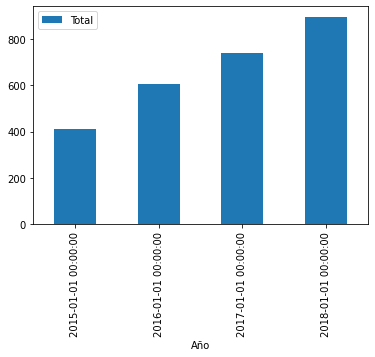

In [8]:
femin.plot(x="Año", y=["Total"], kind="bar")

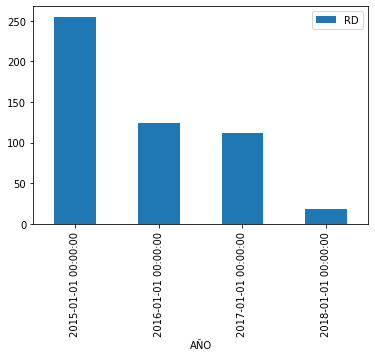

In [9]:
desap.plot(x="AÑO", y=["RD"], kind="bar")

Es curioso como la cantidad de feminicidios denunciados aumentó y la cantidas de mujeres desaparecidas disminuyó, ¿verdad?

### Gráficas de barras de feminicidios y desaparecidas por estado.




In [10]:
femin_est = Feminicidios.groupby(by = ['Entidad']).Total.sum().reset_index()
femin_est = pd.DataFrame(femin_est)
femin_est.head()

,Entidad,Total
0,Aguascalientes,4
1,Baja California,60
2,Baja California Sur,0
3,Campeche,13
4,Chiapas,118


In [11]:
desap_est = Desaparecidos.groupby(by = ['Estado']).RD.sum().reset_index()
desap_est = pd.DataFrame(data=desap_est)
desap_est.head()

,Estado,RD
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,5
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,5


In [12]:
fem_des_est = pd.concat([femin_est, desap_est], axis=1)
fem_des_est.drop(['Estado'], axis = 'columns', inplace=True)
fem_des_est.head(10)

,Entidad,Total,RD
0,Aguascalientes,4,0
1,Baja California,60,5
2,Baja California Sur,0,1
3,Campeche,13,0
4,Chiapas,118,5
5,Chihuahua,55,0
6,Ciudad de México,186,408
7,Coahuila de Zaragoza,52,5
8,Colima,43,4
9,Durango,17,2


<Figure size 720x720 with 0 Axes>

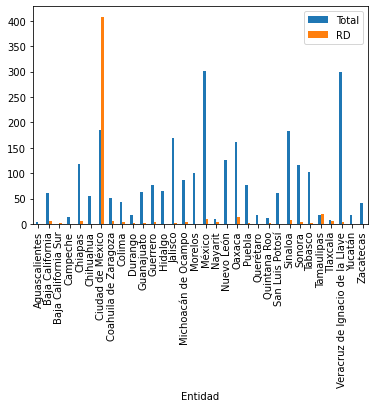

<Figure size 720x720 with 0 Axes>

In [13]:
fem_des_est.plot(x="Entidad", y=["Total", "RD"], kind="bar")
# changing the size of figure to 2X2
plt.figure(figsize=(10, 10))


De primera instancia, se puede observar que los unicos estados donde la cantidad de reportes de desapariciones fue mayor al número de feminicidios fueron Ciudad de México y Tamaulipas, teniendo este último una diferencia muy pequeña. 

##De las encontradas con vida



### Gráfica de barras del total de desaparecidas voluntaria e involuntariamente.



In [14]:
EVDV= Desaparecidos.groupby("AÑO").sum()["EVDV"].reset_index()
print("El número total de mujeres encontradas con vida, desaparecidas de forma voluntaria es de "+str()+":")
EVDV=pd.DataFrame(EVDV)
EVDV = EVDV.rename(columns ={'AÑO':'Año'})
print(EVDV)


El número total de mujeres encontradas con vida, desaparecidas de forma voluntaria es de :
         Año  EVDV
0 2015-01-01    40
1 2016-01-01    19
2 2017-01-01     8
3 2018-01-01     2


In [15]:
EVDI= Desaparecidos.groupby("AÑO").sum()["EVDI"].reset_index()
print("El número total de mujeres encontradas con vida, desaparecidas de forma involuntaria es de "+str()+":")
EVDI=pd.DataFrame(EVDI)
print(EVDI)

El número total de mujeres encontradas con vida, desaparecidas de forma involuntaria es de :
         AÑO  EVDI
0 2015-01-01     7
1 2016-01-01     6
2 2017-01-01     2
3 2018-01-01     3


In [16]:
evdv_evdi = pd.concat([EVDV, EVDI], axis=1)
evdv_evdi.drop(evdv_evdi.columns[[2]], axis=1, inplace=True)
evdv_evdi

,Año,EVDV,EVDI
0,2015-01-01,40,7
1,2016-01-01,19,6
2,2017-01-01,8,2
3,2018-01-01,2,3


<Figure size 720x720 with 0 Axes>

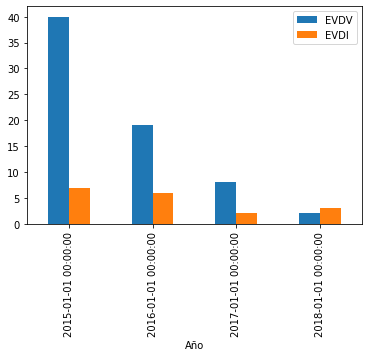

<Figure size 720x720 with 0 Axes>

In [17]:
evdv_evdi.plot(x="Año", y=["EVDV", "EVDI"], kind="bar")
# changing the size of figure to 10*10
plt.figure(figsize=(10, 10))

Es curioso observar como es mayor el número de mujeres encontradas con vida que fueron desaparecidas de forma voluntaria. Esto hace referencia a que gran parte de las mujeres desaparecidas, lo hicieron por voluntad propia, sin intervención de un tercero. 
Esto te contradice para el año 2018, donde evidentemente se observa menor cantidad de personar encontradas con vida (probablemente porque de igual manera el número de reportes de desapariciones fue menor para ese año en comparación a los anteriores). 

### Gráfica de barras de encontradas con vida por estado.
  


In [18]:
EVDVest= Desaparecidos.groupby("Estado").sum()["EVDV"].reset_index()
print("El número total por estado de mujeres encontradas con vida, desaparecidas de forma voluntaria es de "+str()+":")
EVDVest=pd.DataFrame(EVDVest)
EVDVest = EVDVest.rename(columns ={'Estado':'ESTADO'})
EVDVest.head(7)

El número total por estado de mujeres encontradas con vida, desaparecidas de forma voluntaria es de :


,ESTADO,EVDV
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,0
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,1
5,CHIHUAHUA,0
6,CIUDAD DE MÉXICO,59


In [19]:
EVDIest= Desaparecidos.groupby("Estado").sum()["EVDI"].reset_index()
print("El número total por estado de mujeres encontradas con vida, desaparecidas de forma involuntaria es de "+str()+":")
EVDIest=pd.DataFrame(EVDIest)
EVDIest.head(7)

El número total por estado de mujeres encontradas con vida, desaparecidas de forma involuntaria es de :


,Estado,EVDI
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,0
2,BAJA CALIFORNIA SUR,0
3,CAMPECHE,0
4,CHIAPAS,0
5,CHIHUAHUA,0
6,CIUDAD DE MÉXICO,9


In [20]:
evdv_evdi_est = pd.concat([EVDVest, EVDIest], axis=1)
evdv_evdi_est.drop(evdv_evdi_est.columns[[2]], axis=1, inplace=True)
evdv_evdi_est.head(7)

,ESTADO,EVDV,EVDI
0,AGUASCALIENTES,0,0
1,BAJA CALIFORNIA,0,0
2,BAJA CALIFORNIA SUR,1,0
3,CAMPECHE,0,0
4,CHIAPAS,1,0
5,CHIHUAHUA,0,0
6,CIUDAD DE MÉXICO,59,9


<Figure size 720x720 with 0 Axes>

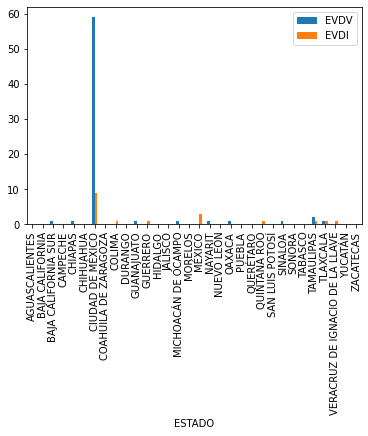

<Figure size 720x720 with 0 Axes>

In [21]:
evdv_evdi_est.plot(x="ESTADO", y=["EVDV", "EVDI"], kind="bar")
# changing the size of figure to 10*10
plt.figure(figsize=(10, 10))

A simple vista, solamente se observan dos estados donde la cantidad de mujeres encontradas con vida que desaparecieron de forma involuntaria son en el Estado de México y en Veracruz.
En cambio, en la Ciudad de México, hay un gran número de encontradas con vida-desaparecidas de forma involuntaria, pero es muchísimo mas grande el número de las desaparecidas de forma voluntaria. 

### Histograma de año con más encontradas con vida respecto al total de reportes de desaparecidas.




In [22]:
des= Desaparecidos.groupby("AÑO").sum()["RD"].reset_index()
des


,AÑO,RD
0,2015-01-01,255
1,2016-01-01,124
2,2017-01-01,112
3,2018-01-01,18


In [23]:
ev = pd.concat([EVDV, EVDI], axis=1)
ev.drop(ev.columns[[2]], axis=1, inplace=True)
col_listev= list(ev)
ev['EV'] = ev[col_listev].sum(axis=1)
ev.drop(['EVDV', 'EVDI'], axis = 'columns', inplace=True)
ev

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Año,EV
0,2015-01-01,47
1,2016-01-01,25
2,2017-01-01,10
3,2018-01-01,5


In [24]:
desev = pd.concat([des, ev], axis=1)
desev.drop(desev.columns[[2]], axis=1, inplace=True)
desev

,AÑO,RD,EV
0,2015-01-01,255,47
1,2016-01-01,124,25
2,2017-01-01,112,10
3,2018-01-01,18,5


<Figure size 720x720 with 0 Axes>

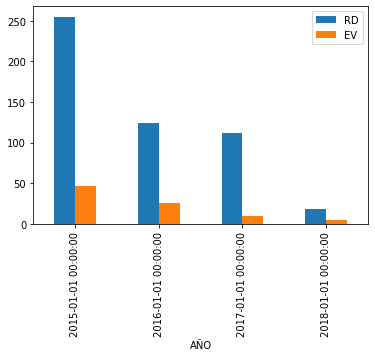

<Figure size 720x720 with 0 Axes>

In [25]:
desev.plot(x="AÑO", y=["RD", "EV"], kind="bar")
# changing the size of figure to 10*10
plt.figure(figsize=(10, 10))

Se observa la comparativa del total de las mujeres reportadas como desaparecidas y del total de encontradas con vida. 
Es muy grande la diferencia en los primeros años. ¿Esto se complementa con las mujeres encontradas sin vida y que se dejaron de buscar? ¿O con el número de feminicidios? ¿Cada vez desaparecen menos personas o simplemente se reportan menos desapariciones?

## De las encontradas sin vida/se dejaron de buscar




### Gráfica de barras del total de desaparecidas encontradas sin vida y que se dejaron de buscar.

  

In [26]:
DESV = Desaparecidos.groupby("AÑO").sum()["DESV"].reset_index()
print("El número total de mujeres encontradas sin vida es de "+str()+":")
DESV=pd.DataFrame(DESV)
DESV = DESV.rename(columns ={'AÑO':'Año'})
DESV


El número total de mujeres encontradas sin vida es de :


,Año,DESV
0,2015-01-01,0
1,2016-01-01,0
2,2017-01-01,0
3,2018-01-01,0


In [27]:
CDNB= Desaparecidos.groupby("AÑO").sum()["CDNB"].reset_index()
print("El número total de mujeres que se dejaron de buscar es de "+str()+":")
CDNB=pd.DataFrame(CDNB)
CDNB

El número total de mujeres que se dejaron de buscar es de :


,AÑO,CDNB
0,2015-01-01,141
1,2016-01-01,43
2,2017-01-01,34
3,2018-01-01,9


In [28]:
desv_cdnb = pd.concat([DESV, CDNB], axis=1)
desv_cdnb.drop(desv_cdnb.columns[[2]], axis=1, inplace=True)
desv_cdnb

,Año,DESV,CDNB
0,2015-01-01,0,141
1,2016-01-01,0,43
2,2017-01-01,0,34
3,2018-01-01,0,9


<Figure size 720x720 with 0 Axes>

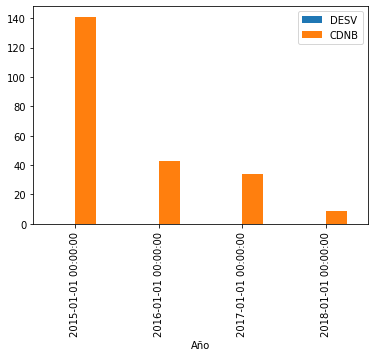

<Figure size 720x720 with 0 Axes>

In [29]:
desv_cdnb.plot(x="Año", y=["DESV", "CDNB"], kind="bar")
# changing the size of figure to 10*10
plt.figure(figsize=(10, 10))

¿Qué nos dice este gráfico? Prácticamente que las mujeres que fueron reportadas como desaparecidas, y no las encontraron con vida, las dejan de buscar. No son capaces de invertir recursos en encontrar sus cuerpos para darle un poco de tranquilidad a sus familias.
Perdón, pe puse sentimental. 

### Gráfica de barras de encontradas sin vida/se dejaron de buscar por estado.



In [30]:
DESVest= Desaparecidos.groupby("Estado").sum()["DESV"].reset_index()
print("El número total por estado de mujeres encontradas sin vida es de "+str()+":")
DESVest=pd.DataFrame(DESVest)
DESVest = DESVest.rename(columns ={'Estado':'ESTADO'})
DESVest.head(7)

El número total por estado de mujeres encontradas sin vida es de :


,ESTADO,DESV
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,0
2,BAJA CALIFORNIA SUR,0
3,CAMPECHE,0
4,CHIAPAS,0
5,CHIHUAHUA,0
6,CIUDAD DE MÉXICO,0


In [31]:
CDNBest= Desaparecidos.groupby("Estado").sum()["CDNB"].reset_index()
print("El número total por estado de mujeres que se dejaron de buscar es de "+str()+":")
CDNBest=pd.DataFrame(CDNBest)
CDNBest.head(7)

El número total por estado de mujeres que se dejaron de buscar es de :


,Estado,CDNB
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,5
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,4
5,CHIHUAHUA,0
6,CIUDAD DE MÉXICO,156


In [32]:
desv_cdnb_est = pd.concat([DESVest, CDNBest], axis=1)
desv_cdnb_est.drop(desv_cdnb_est.columns[[2]], axis=1, inplace=True)
desv_cdnb_est.head(7)

,ESTADO,DESV,CDNB
0,AGUASCALIENTES,0,0
1,BAJA CALIFORNIA,0,5
2,BAJA CALIFORNIA SUR,0,1
3,CAMPECHE,0,0
4,CHIAPAS,0,4
5,CHIHUAHUA,0,0
6,CIUDAD DE MÉXICO,0,156


<Figure size 720x720 with 0 Axes>

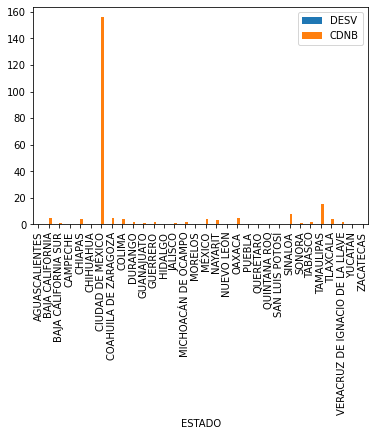

<Figure size 720x720 with 0 Axes>

In [33]:
desv_cdnb_est.plot(x="ESTADO", y=["DESV", "CDNB"], kind="bar")
# changing the size of figure to 10*10
plt.figure(figsize=(10, 10))

El estado con mayor número de mujeres desaparecidas que se dejaron de buscar es la Ciudad de México, y claro, es el estado con mayor número de reporte de desaparición. 

### Gráfica de barras de año con mas encontradas sin vida/se dejaron de buscar.



In [34]:
esv = pd.concat([DESV, CDNB], axis=1)
esv.drop(esv.columns[[2]], axis=1, inplace=True)
col_listesv= list(esv)
esv['ESV'] = esv[col_listesv].sum(axis=1)
esv.drop(['DESV', 'CDNB'], axis = 'columns', inplace=True)
esv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Año,ESV
0,2015-01-01,141
1,2016-01-01,43
2,2017-01-01,34
3,2018-01-01,9


In [35]:
desesv = pd.concat([des, ev, esv], axis=1)
desesv.drop(desesv.columns[[2]], axis=1, inplace=True)
desesv

,AÑO,RD,EV,ESV
0,2015-01-01,255,47,141
1,2016-01-01,124,25,43
2,2017-01-01,112,10,34
3,2018-01-01,18,5,9


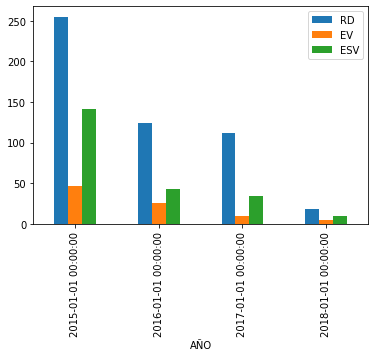

In [36]:
desesv.plot(x="AÑO", y=["RD", "EV", "ESV"], kind="bar")

Se pueden observar el total anual de los reportes de personas desaparecidas, el total de las encontradas con vida, ya sea que hayan desaparecido voluntaria o involuntariamente, así como también el total de las encontradas sin vida y que se dejaron de buscar. 
Hay inconsistencia en el total de los números, ¿qué sucede con los reportes de personas desaparecidas que no se registraron como personas encontradas con vida, sin vida ni que se dejaron de buscar?

### Gráfica de barras del total de feminicidios y de personas encontradas sin vida/se dejaron de buscar. 

In [37]:
esv = esv.rename(columns ={'Año':'AÑO'})
femesv = pd.concat([femin, esv], axis=1)
femesv.drop(femesv.columns[[2]], axis=1, inplace=True)
femesv = femesv.rename(columns ={'Total':'Feminicidios'})
femesv

,Año,Feminicidios,ESV
0,2015-01-01,412,141
1,2016-01-01,607,43
2,2017-01-01,742,34
3,2018-01-01,898,9


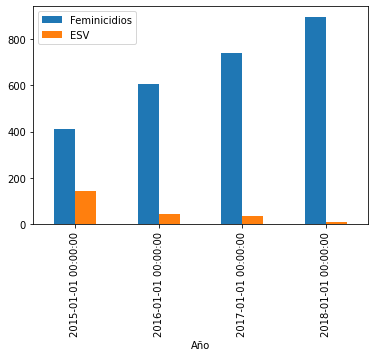

In [38]:
femesv.plot(x="Año", y=["Feminicidios", "ESV"], kind="bar")

In [39]:
tesv_est = desv_cdnb_est
col_listtesv_est= list(tesv_est)
#Suma de columnas numéricas (solo los datos registrados en meses para obtener el total anual)
tesv_est['ESV'] = tesv_est[col_listtesv_est].sum(axis=1)
tesv_est.drop(['DESV', 'CDNB'], axis = 'columns', inplace=True)

tesv_est.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,ESTADO,ESV
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,5
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,4


In [40]:
femesv_est = pd.concat([femin_est, tesv_est], axis=1)
femesv_est.drop(femesv_est.columns[[2]], axis=1, inplace=True)
femesv_est = femesv_est.rename(columns ={'Total':'Feminicidios'})
femesv_est.head()

,Entidad,Feminicidios,ESV
0,Aguascalientes,4,0
1,Baja California,60,5
2,Baja California Sur,0,1
3,Campeche,13,0
4,Chiapas,118,4


En todos los años estudiados, en Baja California Sur se reportaron como encontradas sin vida/se dejaron de buscar a dos mujeres, pero no hubo denuncia de feminicidio.
¿Por qué se habrán encontrado sin vida a estas dos mujeres que desaparecieron y no se denunció un feminicidio?
¿A caso la razón de su muerte estuvo relacionada con algún crimen cometido?
¿O simplemente no se quiso denunciar un feminicidio por sus familiares? ¿o no había quien lo hiciera?

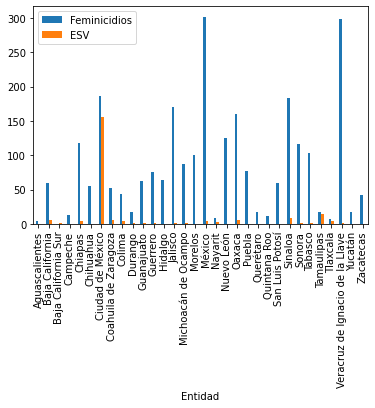

In [41]:
femesv_est.plot(x="Entidad", y=["Feminicidios", "ESV"], kind="bar")

#### Análisis de componentes principales

In [42]:
femesv_est['ent_encode']=LabelEncoder().fit_transform(femesv_est.Entidad)
femesv_est.drop(['Entidad'],axis=1, inplace=True)
femesv_est.head()

,Feminicidios,ESV,ent_encode
0,4,0,0
1,60,5,1
2,0,1,2
3,13,0,3
4,118,4,4


shape of X_pca (32, 3)
[0.41659322 0.38115881 0.20224797]
suma: 1.0


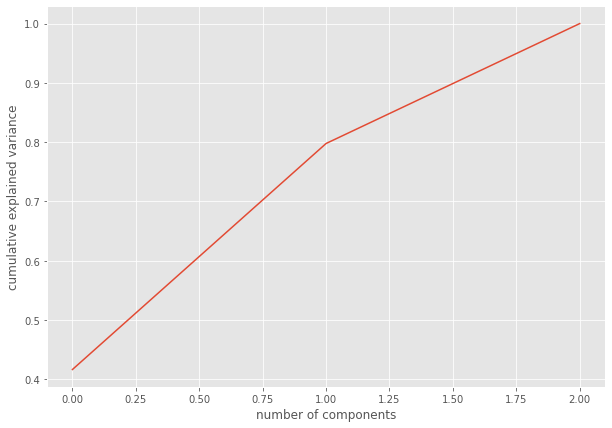

In [54]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')

#Se elimina la variable dependiente y se normalizan los datos
scaler=StandardScaler()
femesv_est.drop(['ent_encode'], axis=1)
scaler.fit(femesv_est)
X_scaled=scaler.transform(femesv_est)
 
pca=PCA(n_components=26)
pca=PCA(.93)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:16]))


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

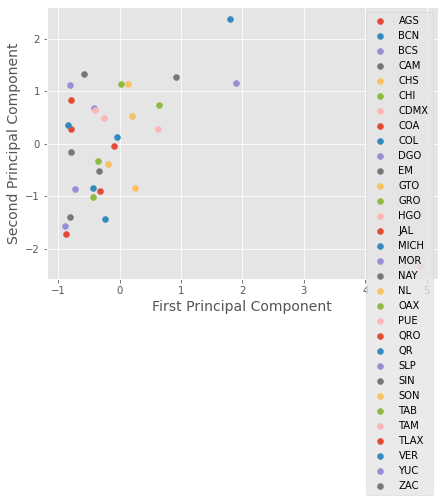

In [59]:
#graficamos en 2 Dimensiones
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=femesv_est['ent_encode'].values
labl={0:'AGS',1:'BCN', 2:'BCS', 3:'CAM', 4:'CHS', 5:'CHI', 6:'CDMX', 7:'COA', 8:'COL', 9:'DGO', 10:'EM', 11:'GTO', 12:'GRO', 13:'HGO', 14:'JAL', 15:'MICH', 16:'MOR',
      17:'NAY', 18:'NL', 19:'OAX', 20:'PUE', 21:'QRO', 22:'QR', 23:'SLP', 24:'SIN', 25:'SON', 26:'TAB', 27:'TAM', 28:'TLAX', 29:'VER', 30:'YUC', 31:'ZAC'}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],label=labl[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

De forma general, se observa una cantidad muchísimo mayor de feminicidios que de mujeres encontradas sin vida/se dejaron de buscar, lo cual lleva implicito el hecho de que se reportaron como desaparecidas. 
Esto se exceptúa en la Ciudad de México, donde la cantidad de reportes de mujeres desaparecidas encontradas sin vida/se dejaron de buscar es mayor al número de feminicidios denunciados, lo que nos podría indicar que estas mujeres encontradas sin vida tal vez fallecieron por otras razones no relacionadas a feminicidio. 
Es importante recordar que un feminicidio es el asesinato de una mujer por el hecho de serlo, por lo que el asesinato de una mujer que haya estado involucrada en trabajos ilícitos, por ejemplo trata narcotráfico, no se debería considerar como feminicidio. Sin embargo, hay excepciones.
También se puede estimar que el hecho de que haya menor número de denuncias de feminicidios sea porque simplemente no se quiso levantar denuncia, no hubo quien lo hiciera o hubo falta de información o facilidades para llevar a cabo la denuncia. 

## Diseño de KPI

Se realizó un KPI que ayuda a determinar a lo largo de algunos años la cantidad de mujeres reportadas como desaparecidas que fueron encontradas sin vida/se dejaron de buscar y la cantidad de feminicidios denunciados, esto con la intención de observar si la cantidad de mujeres encontradas sin vida es mayor o igual al numero de feminicidios.

El análisis del KPI puede ser visto [aquí](https://docs.google.com/document/d/1m8dPYxI-4iYzJDj94mUbpY3C-8gEHC8PVVfNAHujNqA/edit?usp=sharing).

Datos de los feminicidios denunciados y las mujeres desaparecidas encontradas sin vida/se dejaron de buscar.

In [ ]:
#Feminicidios
femin

In [ ]:
#Encontradas sin vida
esv

In [ ]:
femesv

In [ ]:
femesv.plot(x="Año", y=["Feminicidios", "ESV"], kind="bar")

## Borrador Dashboard

A continuación se anexa el borrador del diseño del futuro dashboard, el cual fue elaborado en [draw.io](https://app.diagrams.net/).

Dicho dashboard constará de tres apartados, los cuales se describen a continuación:

* General:
  * Problemática, información general.
  * Cantidades totales: Feminicidios, mujeres reportadas como desaparecidas, encontradas vivas y encontradas sin vida/se dejaron de buscar. 
  * KPI
  * Una gráfica de barras de feminicidios y personas reportadas como desaparecidas.

* De las encontradas con vida:
  * Gráfica de barras del total de desaparecidas voluntaria e involuntariamente.
  * Gráfica de barras de encontradas con vida por estado.
  * Histograma de año con más encontradas con vida respecto al total de reportes de desaparecidas.

* De las encontradas sin vida/se dejaron de buscar:
  * Gráfica de barras del total de desaparecidas encontradas sin vida y que se dejaron de buscar.
  * Gráfica de barras de encontradas sin vida/se dejaron de buscar por estado.
  * Histograma de año con mas encontradas sin vida/se dejaron de buscar.
  * Gráfica de barras del total de feminicidios y de personas encontradas sin vida/se dejaron de buscar. 



<img title="Borrador" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/MCD_IngCaracteristicas/main/Proyecto%202/Diagramas/BorradorDashboard.drawio.png" width="700">